<a href="https://colab.research.google.com/github/AKHIL-882/Fish-Disease-Prevention-and-Detection-using-Machine-Learning/blob/main/Fish%20Disease%20Prevention%20and%20Detection%20using%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.1 Importing the Required Libraries**

In [1]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
import seaborn as sns    

**1.2 Mount the google drive**

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


**1.3 Reading the datasets**

In [128]:
dataset = pd.read_csv('/content/gdrive/MyDrive/fishs.csv')
dataset.head()

,S.NO,temperature,pH,Transparency,salinity,total alkalinity,C02,Calcium,potassium,Iron,output
0,1,25,7.0,30,1,60,3,75,0.5,0.3,1
1,2,25,7.0,30,1,60,3,75,0.5,1.3,1
2,3,25,7.0,30,1,60,3,75,0.5,2.3,1
3,4,25,7.0,30,1,60,3,75,0.5,3.3,1
4,5,25,7.0,30,1,60,3,75,0.5,4.3,1


**1.4 Entire information of Songs dataset**

In [30]:
print("-------------------------------------------------------\nChecking Null values\n-------------------------------------------------------")
print(" " ,dataset.isnull().sum())
print("-------------------------------------------------------\nShape of the dataset\n-------------------------------------------------------")
print(" ",dataset.shape)
print("-------------------------------------------------------\nInformation of dataset\n-------------------------------------------------------")
print("", dataset.info())
print("-------------------------------------------------------\nDescription of the dataset\n-------------------------------------------------------")
print("",dataset.describe())
print("-------------------------------------------------------\nChecking duplication records\n-------------------------------------------------------")
print(sum(dataset.duplicated()))
print("-------------------------------------------------------\nDroping the NaN values\n-------------------------------------------------------")

print(dataset.dropna(axis='columns'))
print(dataset.dropna(how='all'))
print("-------------------------------------------------------\nChecking for Null\n-------------------------------------------------------")
print(dataset.isnull().sum())
print("-------------------------------------------------------\nChecking for Unique values\n-------------------------------------------------------")
print(dataset.nunique())

-------------------------------------------------------
Checking Null values
-------------------------------------------------------
  S.NO                0
temperature         0
pH                  0
Transparency        0
salinity            0
total alkalinity    0
C02                 0
Calcium             0
potassium           0
Iron                0
output              0
dtype: int64
-------------------------------------------------------
Shape of the dataset
-------------------------------------------------------
  (100, 11)
-------------------------------------------------------
Information of dataset
-------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S.NO              100 non-null    int64  
 1   temperature       100 non-null    int64  
 2   pH                100 non-null   

**Observation:** There are no null and duplicate values. Dataset is in the shape of (100, 11) - where 100 rows and 11 columns

**making output attibute has a categorical attibute**

**1.5 Visualization of Output attribute**

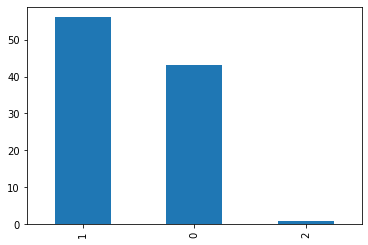

In [46]:
dataset['output'].value_counts().plot(kind = 'bar')

**Observation**: Here the number of 1's are 56 which states the good condition, 0's are 43 which states bad condition and 2's are 1 which states best condition

**1.6 Visualization of PH attribute**

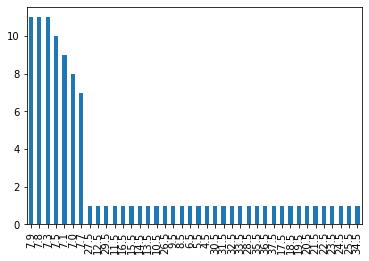

In [47]:
dataset['pH'].value_counts().plot(kind = 'bar')

**Observation**: We can find that 7.9 is the most frequently occured pH value

**1.7 Visualization of PH attribute**

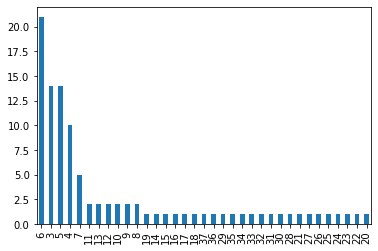

In [48]:
dataset['C02'].value_counts().plot(kind = 'bar')

**Observation**: Mostly CO2 is 6. As we knew most C02 or less CO2 can result in death of fish

**1.8 Droping S.No column**

In [49]:
dataset = dataset.drop('S.NO', axis=1)
dataset.head()

,temperature,pH,Transparency,salinity,total alkalinity,C02,Calcium,potassium,Iron,output
0,25,7.0,30,1,60,3,75,0.5,0.3,1
1,25,7.0,30,1,60,3,75,0.5,1.3,1
2,25,7.0,30,1,60,3,75,0.5,2.3,1
3,25,7.0,30,1,60,3,75,0.5,3.3,1
4,25,7.0,30,1,60,3,75,0.5,4.3,1


**1.9 Univariate analysis for potassium**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


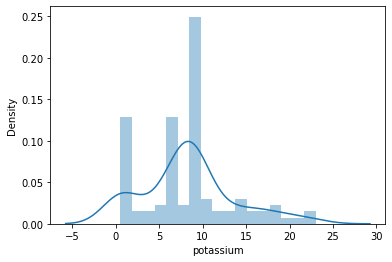

In [50]:
 sns.distplot(dataset.potassium)

**Observation**: Most used potassium is 0.5 and the hightest is 21 recored and the data is not normalized.

**2.0 Univariate analysis for Iron**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


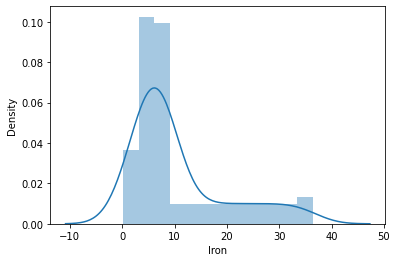

In [51]:
 sns.distplot(dataset.Iron)

**2.1 Univariate analysis on irona nd outout**

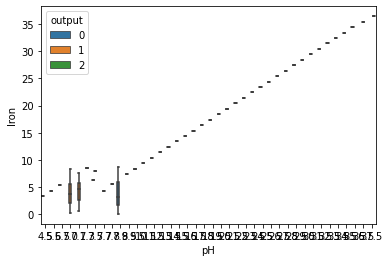

In [52]:
sns.boxplot(x='pH',y='Iron',hue='output', data = dataset)

**2.2 Counter Plot between potassium and output**

Text(0, 0.5, 'Output')

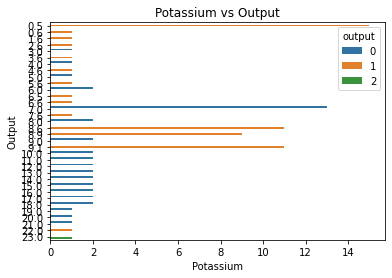

In [53]:
sns.countplot(y = 'potassium', data = dataset, hue = 'output')
plt.title('Potassium vs Output')
plt.xlabel('Potassium')
plt.ylabel('Output')

**2.3 Heat map to find the correlation**

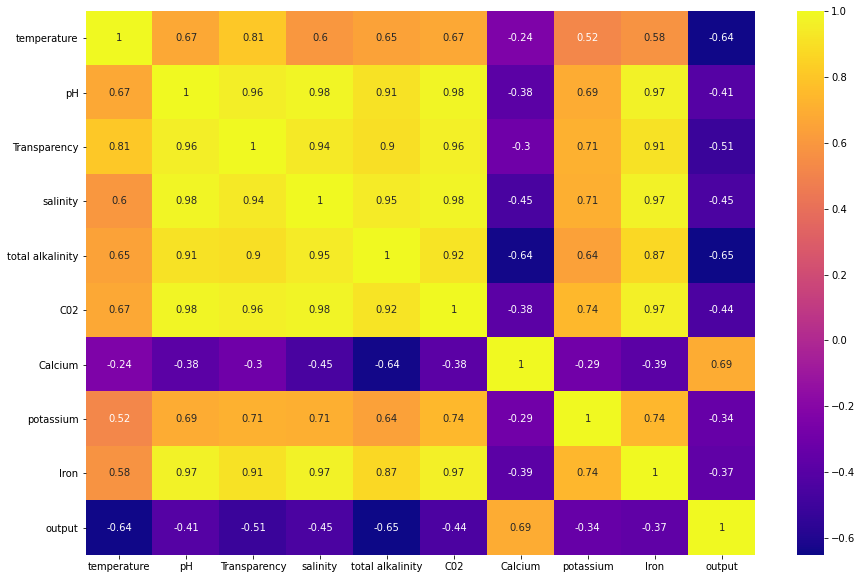

In [54]:
fig,ax = plt.subplots(figsize = (15,10))
sns.heatmap(dataset.corr(),cmap='plasma',annot=True)

**Observation**: We can find that the variable are somhow correlated with each other

**2.4 Scatter plot to find the relation between the attributes**

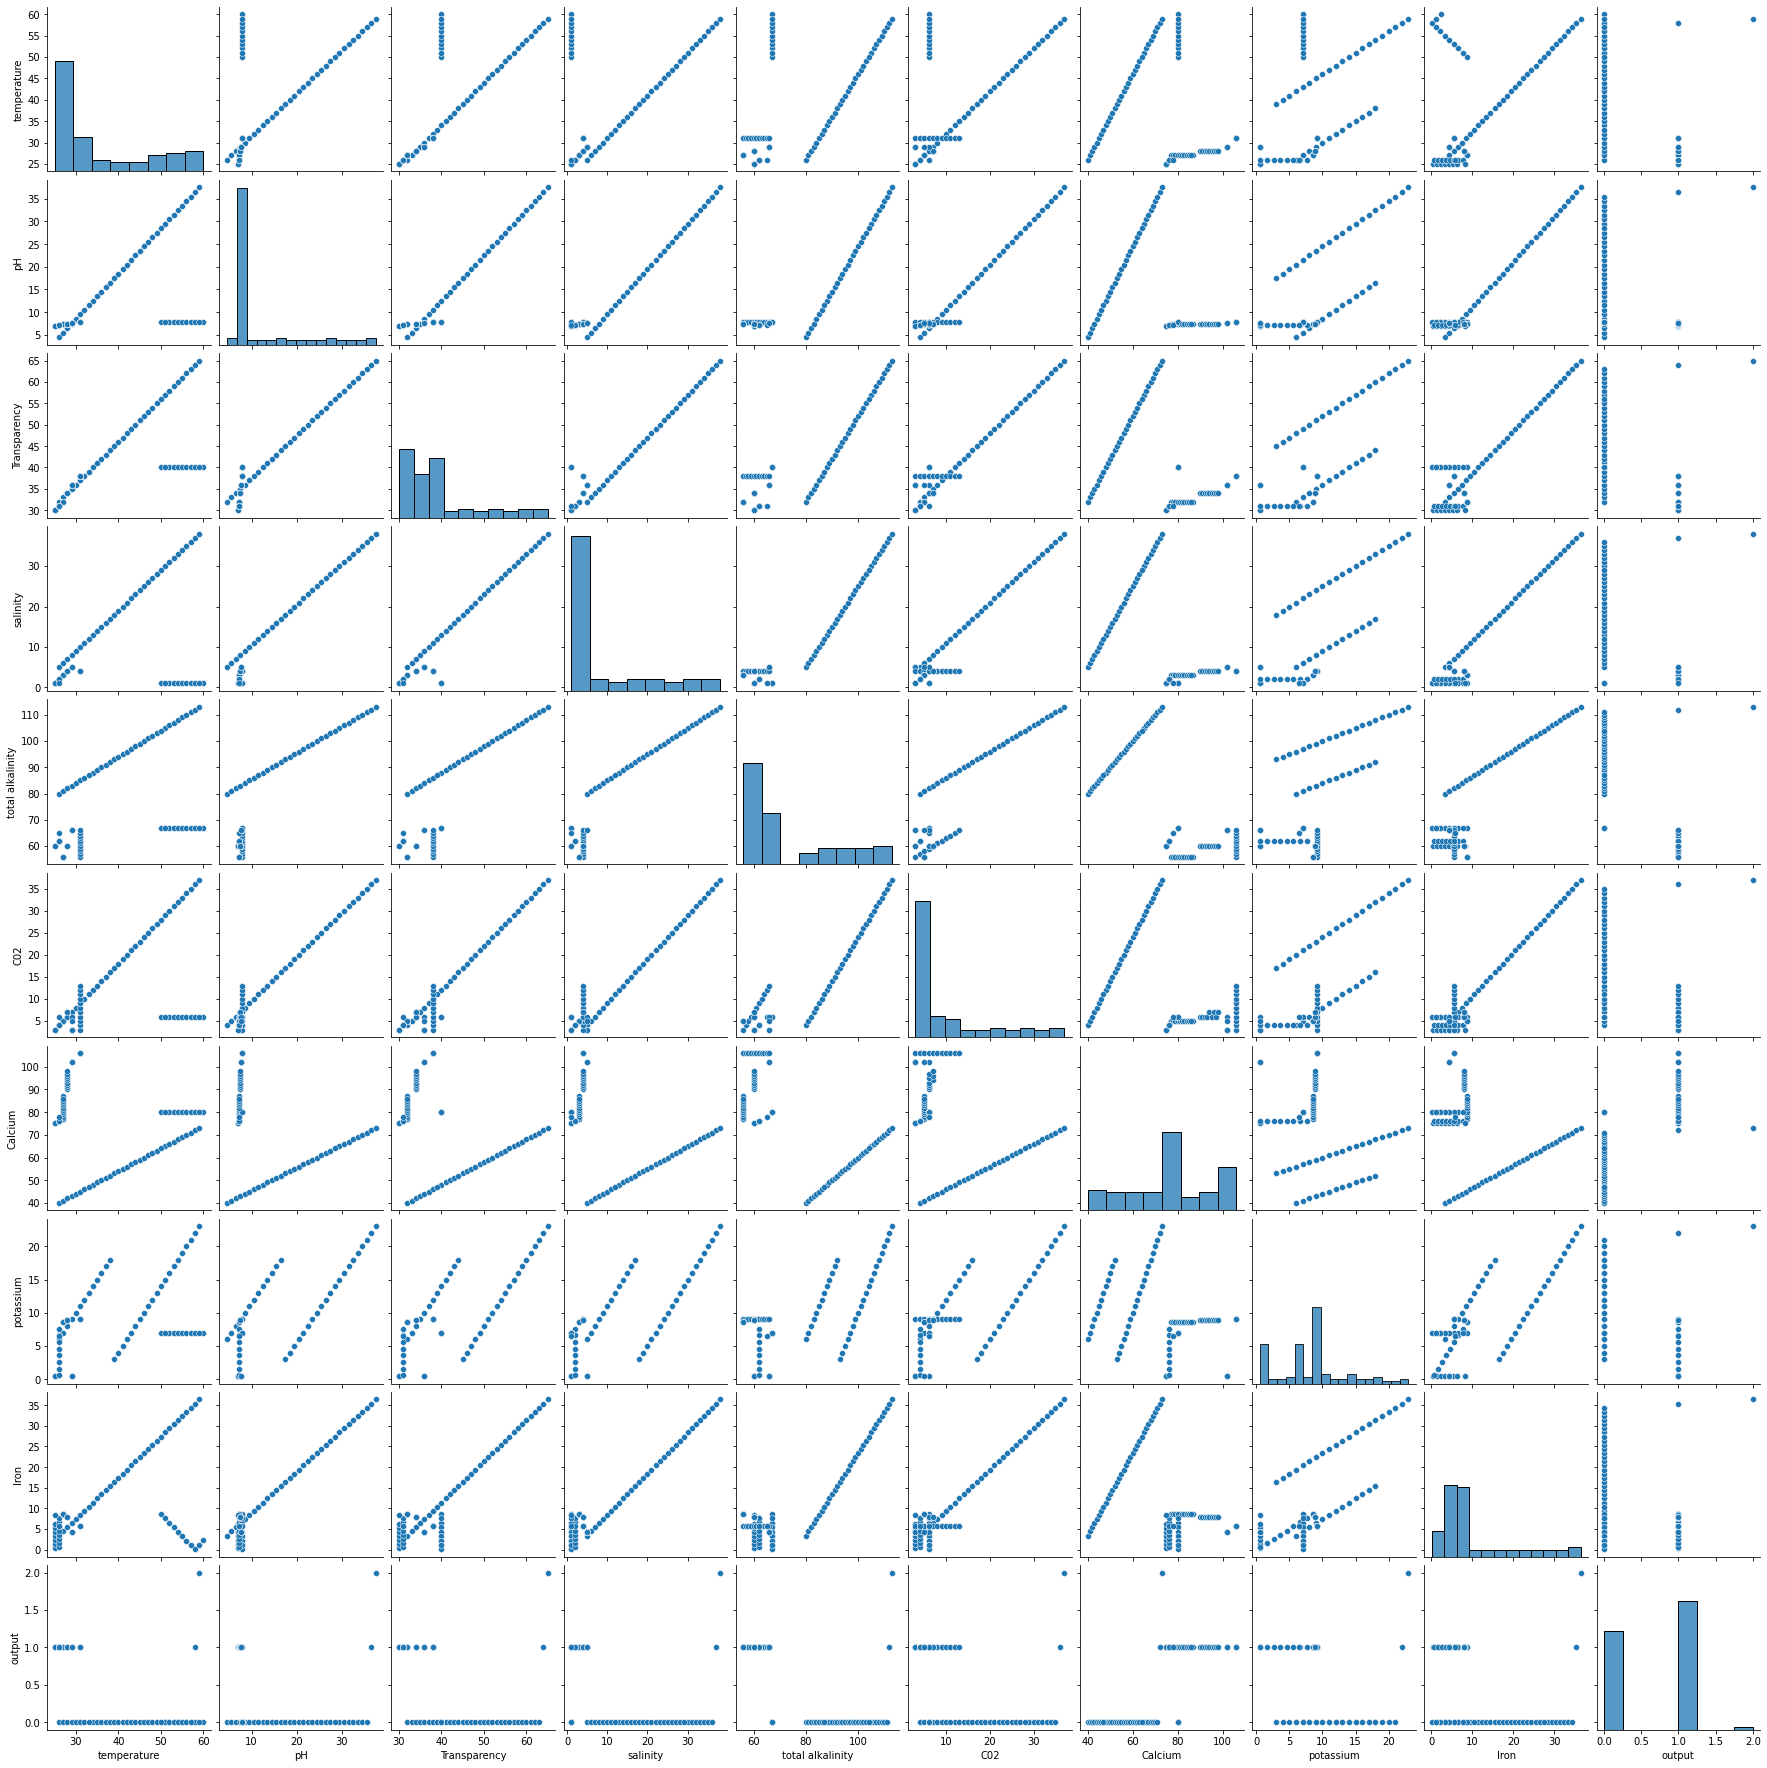

In [55]:
sns.pairplot(dataset)

**Observation**: We can find that most of the data is correlated and graphs shows a diagonal line which makes up to apply linear or logistic regression(categorical)

**2.5 Transformations of feature variables**

**2.5.1 Print the columns of dataset**

In [58]:
dataset.columns

Index(['temperature', 'pH', 'Transparency', 'salinity', 'total alkalinity',
       'C02', 'Calcium', 'potassium', 'Iron', 'output'],
      dtype='object')

**2.5.2 Collecting data into x and y variables**

In [129]:
x = dataset[['temperature','pH','salinity','C02','potassium','Iron']]
y = dataset['output'].values

**2.5.3 Scale iron and potassium**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


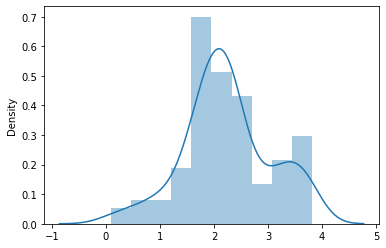

In [130]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['Iron'].values.reshape(-1,1))
sns.distplot(pt.transform(x['Iron'].values.reshape(-1,1)))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


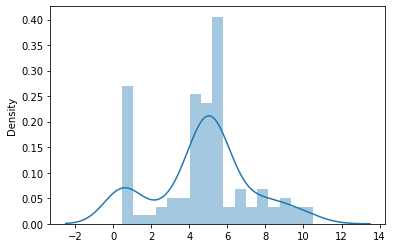

In [131]:
pt = PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(x['potassium'].values.reshape(-1,1))
sns.distplot(pt.transform(x['potassium'].values.reshape(-1,1)))

**Observations**: Both Iron and Potassium columns are transformed

### **2.6 Building the Machine Learning Model - Logistic Regression**

**Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature. Logistic regression is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1**

**2.6.1 Importing the StandardScaler and Train_test_split**

In [110]:
# dataset = dataset.drop(['Calcium','total alkalinity','Transparency','Iron'], axis=1)
# dataset.head()

,temperature,pH,salinity,C02,potassium,output
0,25,7.0,1,3,0.5,1
1,25,7.0,1,3,0.5,1
2,25,7.0,1,3,0.5,1
3,25,7.0,1,3,0.5,1
4,25,7.0,1,3,0.5,1


In [124]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 1].values
y = y.astype('int')
X


,temperature,pH,salinity,C02,potassium
0,25,7.0,1,3,0.5
1,25,7.0,1,3,0.5
2,25,7.0,1,3,0.5
3,25,7.0,1,3,0.5
4,25,7.0,1,3,0.5
...,...,...,...,...,...
95,28,7.5,4,7,8.9
96,28,7.5,4,6,8.9
97,28,7.5,4,7,8.9
98,29,7.7,5,6,0.5


In [125]:

dataset.columns

Index(['temperature', 'pH', 'salinity', 'C02', 'potassium', 'output'], dtype='object')

In [132]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [133]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [134]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:

print(model.intercept_)
print(model.coef_)

1.5987211554602254e-14
[-2.23202417e-16  1.00000000e+00 -1.11022302e-16  0.00000000e+00
 -1.11022302e-16 -1.11022302e-16]


In [140]:

y_pred = model.predict(X_test)
y_pred = y_pred.astype('int')
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df



,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,1,0
4,1,1
5,1,0
6,1,1
7,1,1
8,1,0
9,1,0


In [141]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [142]:

print("Mean Absolute Error :",metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score:",metrics.r2_score(y_test,y_pred) *100)
r_squared = r2_score(y_test, y_pred)
print('R-Squared : ',r_squared *100)

Mean Absolute Error : 0.4
Root Mean Squared Error :  0.6324555320336759
R2 score: -80.00000000000004
R-Squared :  -80.00000000000004


In [143]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[10  0]
 [12  8]]


In [144]:
from pickle import dump
file = 'model.h5'
dump(model,open(file,'wb'))

In [145]:
from pickle import load
x = load(open('model.h5','rb'))

In [152]:
print(X.shape,X.shape,y.shape,y.shape
      )

(100, 5) (100, 5) (100,) (100,)


In [161]:
# enter the values in this format 'temperature','pH','salinity','C02','potassium','Iron'

y = x.predict([[26,4.5,5,4,6,3.4]])
print('The the chemicals used are',"Best" if int(round(y[0])) == 1 else "bad")


The the chemicals used are bad
